In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cols_model_args = ['theta_obs', 'beta_mu', 'mc2', 'a_portion', 'phi_0']
cols_L = [f'L_{i}' for i in range(45)]
cols_vals = ['L_x', 'PF', 'R_e', 'ksi_shock']
cols = cols_model_args + cols_vals + cols_L

#### Funcs

In [20]:
def get_model_args_by_idx(idx):
    theta_obs = df.loc[idx, 'theta_obs']
    beta_mu = df.loc[idx, 'beta_mu']
    mc2 = df.loc[idx, 'mc2']
    a_portion = df.loc[idx, 'a_portion']
    phi_0 = df.loc[idx, 'phi_0']
    return (theta_obs, beta_mu, mc2, a_portion, phi_0)


def get_L(theta_obs, beta_mu, mc2, a_portion, phi_0):
    cond = (df['theta_obs'] == theta_obs) & (df['beta_mu'] == beta_mu) & (df['mc2'] == mc2) & (df['a_portion'] == a_portion) & (df['phi_0'] == phi_0)
    idx = df[cond].index[0]
    L_data = df.loc[idx, cols_L].values
    return L_data

In [99]:
def get_delta(left, right):
    return np.sqrt(np.sum((left - right) ** 2)) # + np.max(np.abs(left - right))


def get_asymetry_metric(L_total):
    L_total = L_total / np.max(L_total)
    
    deltas = np.zeros(L_total.shape[0])
    deltas[0] = float('inf')
    for i in range(1, L_total.shape[0]):
        # отражаем куски относительно фазы разреза. и дополняем до полного профиля
        # правый едет направо, левый - налево от места разреза.
        # если доходим до конца то прыгыаем на другой конец и идем до места разреза
        left = np.concatenate((L_total[:i + 1][::-1], L_total[i + 1:][::-1]))
        right = np.concatenate([L_total[i:], L_total[:i]])
    
        deltas[i] = get_delta(left, right)
        
    ids = np.argsort(deltas)
    print(ids)
    return deltas[ids[0]], ids[0]


def get_asymetry_metric_for_row(row):
    #print(row)
    L_total = row[cols_L].values
    return get_asymetry_metric(L_total)

In [24]:
def roll_to_max(array):
    max_idx = np.argmax(array)
    return np.roll(array, -max_idx)


def get_similarity_metric(L_total, y_data):
    L_total = L_total / np.max(L_total)
    L_total = roll_to_max(L_total)
    
    y_data = y_data/np.max(y_data)
    y_data = roll_to_max(y_data)

    delta = get_delta(L_total, y_data)

    return delta


def get_similarity_metric_for_row(row, y_data):
    #print(row)
    L_total = row[cols_L].values
    return get_similarity_metric(L_total, y_data)

#### Read data

In [3]:
df = pd.read_parquet('data.parquet')

In [4]:
df

,theta_obs,beta_mu,mc2,a_portion,phi_0,L_x,PF,R_e,ksi_shock,L_0,...,L_37,L_38,L_39,L_40,L_41,L_42,L_43,L_44,asymetry_metric,best_id_split
0,0,10,30,0.20,0,4.123326e+38,0.000000,39.357075,10.565971,5.116877e+38,...,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,0.000000,22.0
1,0,10,30,0.25,0,4.604204e+38,0.000000,39.357048,9.074379,5.785381e+38,...,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,0.000000,22.0
2,0,10,30,0.40,0,5.689091e+38,0.000000,39.356932,6.645833,7.654416e+38,...,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,0.000000,22.0
3,0,10,30,0.50,0,6.226257e+38,0.000000,39.356824,5.762526,8.829749e+38,...,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,0.000000,22.0
4,0,10,30,0.60,0,6.669146e+38,0.000000,39.356693,5.143885,8.881790e+38,...,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,0.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,90,80,100,0.40,0,1.005666e+39,0.945919,897.271783,10.129916,1.598635e+37,...,5.391326e+38,5.044166e+38,4.532615e+38,3.920063e+38,3.210643e+38,2.443410e+38,1.652747e+38,9.265150e+37,0.353226,34.0
2245,90,80,100,0.50,0,1.142388e+39,0.788891,897.192914,8.906691,9.462615e+37,...,7.540663e+38,7.003311e+38,6.373128e+38,5.561524e+38,4.663496e+38,3.668043e+38,2.653570e+38,1.754416e+38,0.312704,34.0
2246,90,80,100,0.60,0,1.262111e+39,0.507056,897.096525,8.018003,3.803681e+38,...,1.105275e+39,1.049534e+39,9.750440e+38,8.872224e+38,7.837743e+38,6.715729e+38,5.550000e+38,4.560881e+38,0.236556,34.0
2247,90,80,100,0.75,0,1.417787e+39,0.255099,896.919100,7.054162,9.902838e+38,...,1.632408e+39,1.585804e+39,1.522768e+39,1.447388e+39,1.353646e+39,1.247168e+39,1.131345e+39,1.047227e+39,0.147571,11.0


#### Hists

In [190]:
df

,theta_obs,beta_mu,mc2,a_portion,phi_0,L_x,PF,R_e,ksi_shock,L_0,...,L_37,L_38,L_39,L_40,L_41,L_42,L_43,L_44,asymetry_metric,best_id_split
0,0,10,30,0.20,0,4.123326e+38,0.000000,39.357075,10.565971,5.116877e+38,...,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,5.116877e+38,0.000000,22.0
1,0,10,30,0.25,0,4.604204e+38,0.000000,39.357048,9.074379,5.785381e+38,...,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,5.785381e+38,0.000000,22.0
2,0,10,30,0.40,0,5.689091e+38,0.000000,39.356932,6.645833,7.654416e+38,...,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,7.654416e+38,0.000000,22.0
3,0,10,30,0.50,0,6.226257e+38,0.000000,39.356824,5.762526,8.829749e+38,...,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,8.829749e+38,0.000000,22.0
4,0,10,30,0.60,0,6.669146e+38,0.000000,39.356693,5.143885,8.881790e+38,...,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,8.881790e+38,0.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,90,80,100,0.40,0,1.005666e+39,0.945919,897.271783,10.129916,1.598635e+37,...,5.391326e+38,5.044166e+38,4.532615e+38,3.920063e+38,3.210643e+38,2.443410e+38,1.652747e+38,9.265150e+37,0.353226,34.0
2245,90,80,100,0.50,0,1.142388e+39,0.788891,897.192914,8.906691,9.462615e+37,...,7.540663e+38,7.003311e+38,6.373128e+38,5.561524e+38,4.663496e+38,3.668043e+38,2.653570e+38,1.754416e+38,0.312704,34.0
2246,90,80,100,0.60,0,1.262111e+39,0.507056,897.096525,8.018003,3.803681e+38,...,1.105275e+39,1.049534e+39,9.750440e+38,8.872224e+38,7.837743e+38,6.715729e+38,5.550000e+38,4.560881e+38,0.236556,34.0
2247,90,80,100,0.75,0,1.417787e+39,0.255099,896.919100,7.054162,9.902838e+38,...,1.632408e+39,1.585804e+39,1.522768e+39,1.447388e+39,1.353646e+39,1.247168e+39,1.131345e+39,1.047227e+39,0.147571,11.0


<Axes: xlabel='theta_obs', ylabel='Count'>

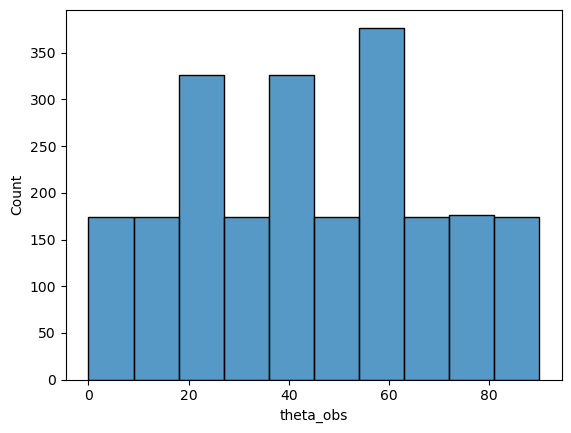

In [196]:
sns.histplot(df['theta_obs'], bins=10)

<Axes: xlabel='beta_mu', ylabel='Count'>

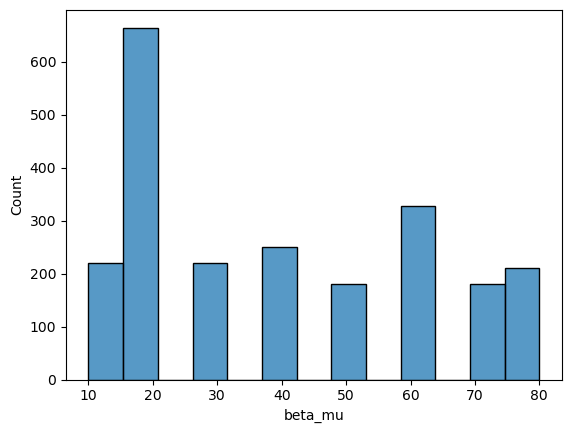

In [194]:
sns.histplot(df['beta_mu'])

<Axes: xlabel='PF', ylabel='Count'>

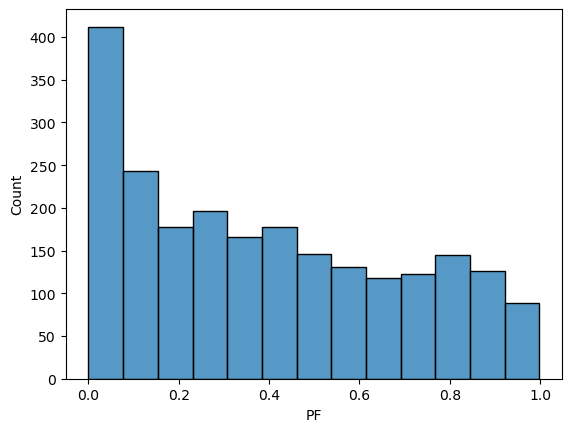

In [158]:
sns.histplot(df['PF'])

<Axes: xlabel='L_x', ylabel='Count'>

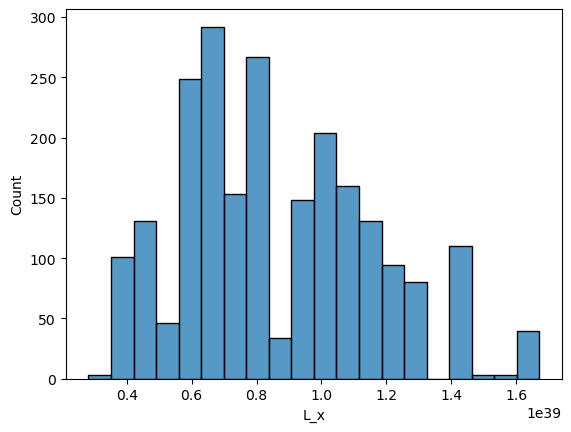

In [160]:
sns.histplot(df['L_x'])

<Axes: xlabel='ksi_shock', ylabel='Count'>

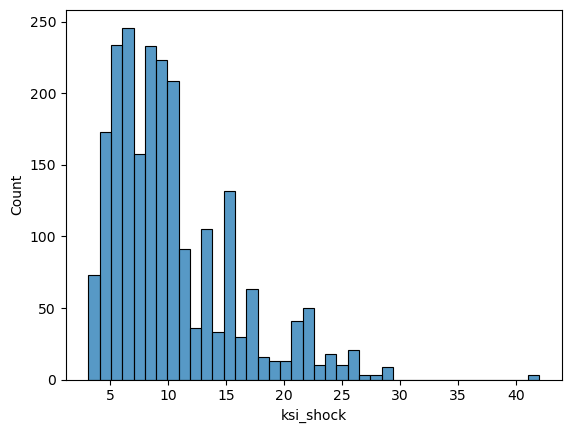

In [162]:
sns.histplot(df['ksi_shock'])

<Axes: xlabel='asymetry_metric', ylabel='Count'>

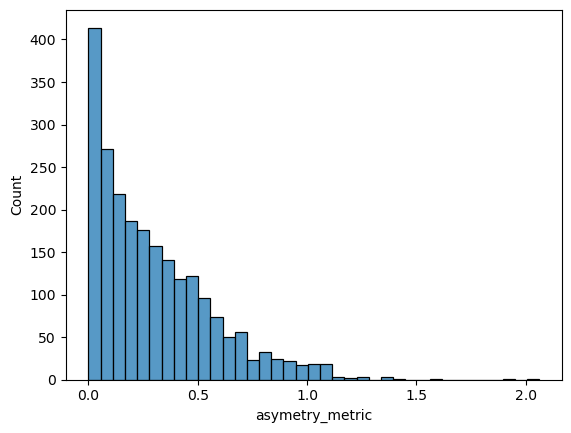

In [246]:
sns.histplot(df['asymetry_metric'])

In [11]:
buf_df = df[(df['asymetry_metric']>1)&(df['phi_0'] != 0)]
buf_df

,theta_obs,beta_mu,mc2,a_portion,phi_0,L_x,PF,R_e,ksi_shock,L_0,...,L_37,L_38,L_39,L_40,L_41,L_42,L_43,L_44,asymetry_metric,best_id_split
468,20,20,60,0.95,40,1.220429e+39,0.411437,35.460504,5.999657,6.168824e+38,...,5.506464e+38,5.536089e+38,5.598224e+38,5.666738e+38,5.729392e+38,5.805956e+38,5.870635e+38,5.956591e+38,1.117421,12.0
898,40,20,30,0.75,40,7.209478e+38,0.760038,43.226635,4.467402,3.244037e+38,...,2.175614e+38,2.298249e+38,2.411453e+38,2.548822e+38,2.704805e+38,2.838564e+38,2.952451e+38,3.082577e+38,1.075728,16.0
899,40,20,30,0.75,60,7.209478e+38,0.810799,43.224090,4.467418,3.717088e+38,...,2.028345e+38,2.173322e+38,2.337335e+38,2.541236e+38,2.776338e+38,2.996216e+38,3.196764e+38,3.453152e+38,1.063098,35.0
900,40,20,30,0.75,80,7.209478e+38,0.830099,43.226635,4.467402,4.250943e+38,...,1.980522e+38,2.168912e+38,2.393773e+38,2.665181e+38,2.986909e+38,3.266822e+38,3.559896e+38,3.895700e+38,1.033060,32.0
962,40,20,60,0.80,40,1.137841e+39,0.645196,35.459930,6.701434,5.469466e+38,...,4.019856e+38,4.239763e+38,4.506059e+38,4.732370e+38,4.888746e+38,5.003990e+38,5.125837e+38,5.268922e+38,1.040906,38.0
964,40,20,60,0.85,40,1.166846e+39,0.670418,35.458249,6.443358,5.391599e+38,...,4.013018e+38,4.265816e+38,4.531487e+38,4.759173e+38,4.925054e+38,5.017979e+38,5.113978e+38,5.202098e+38,1.270148,38.0
966,40,20,60,0.90,40,1.194330e+39,0.710067,35.459554,6.210654,5.315426e+38,...,4.009884e+38,4.295336e+38,4.580093e+38,4.817158e+38,4.934335e+38,4.992623e+38,5.055760e+38,5.159629e+38,1.438680,38.0
968,40,20,60,0.95,40,1.220429e+39,0.763382,35.460504,5.999657,5.239526e+38,...,3.978587e+38,4.303181e+38,4.627212e+38,4.870741e+38,4.930032e+38,4.972724e+38,5.057657e+38,5.140373e+38,1.385122,5.0
1221,50,20,60,0.75,40,1.107160e+39,0.756744,35.460337,6.989582,4.201779e+38,...,2.742024e+38,2.908383e+38,3.078109e+38,3.245181e+38,3.415604e+38,3.595410e+38,3.787631e+38,3.994098e+38,1.054825,39.0
1222,50,20,60,0.75,60,1.107160e+39,0.836840,35.458249,6.989616,5.121168e+38,...,2.634830e+38,2.826632e+38,3.030938e+38,3.279541e+38,3.551325e+38,3.865817e+38,4.207931e+38,4.595245e+38,1.192747,13.0


<Axes: xlabel='a_portion', ylabel='Count'>

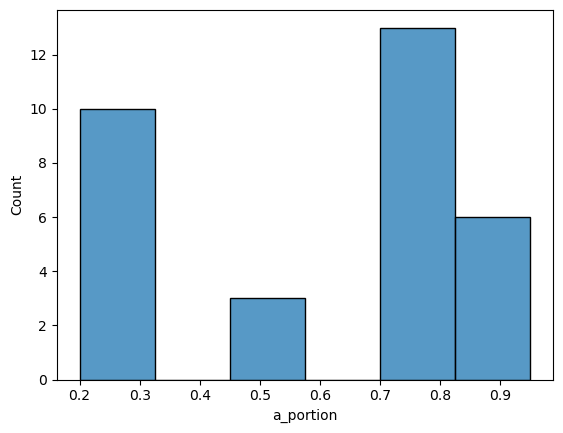

In [263]:
sns.histplot(buf_df['a_portion'])

#### Get asymetry

In [232]:
df[['asymetry_metric', 'best_id_split']] = df.apply(get_asymetry_metric_for_row, axis=1).apply(pd.Series)

In [238]:
df.sort_values('asymetry_metric', ascending=False)

,theta_obs,beta_mu,mc2,a_portion,phi_0,L_x,PF,R_e,ksi_shock,L_0,...,L_37,L_38,L_39,L_40,L_41,L_42,L_43,L_44,asymetry_metric,best_id_split
1629,60,60,60,0.25,120,6.411254e+38,0.963052,37.605115,14.729657,6.031333e+38,...,1.276026e+38,1.552192e+38,1.857906e+38,2.293509e+38,3.029730e+38,3.874817e+38,4.655963e+38,5.367838e+38,2.062611,7.0
1630,60,60,60,0.25,140,6.412042e+38,0.887844,32.026057,14.994991,5.681207e+38,...,1.833457e+38,2.236982e+38,2.745231e+38,3.394475e+38,4.043084e+38,4.567423e+38,4.993924e+38,5.354457e+38,1.901761,12.0
1927,80,20,60,0.20,60,5.640228e+38,0.924682,34.774358,17.408522,2.981038e+38,...,3.114990e+37,3.320342e+37,4.546769e+37,5.979350e+37,7.682497e+37,1.037102e+38,3.733449e+38,3.323452e+38,1.616442,37.0
966,40,20,60,0.90,40,1.194330e+39,0.710067,35.459554,6.210654,5.315426e+38,...,4.009884e+38,4.295336e+38,4.580093e+38,4.817158e+38,4.934335e+38,4.992623e+38,5.055760e+38,5.159629e+38,1.438680,38.0
968,40,20,60,0.95,40,1.220429e+39,0.763382,35.460504,5.999657,5.239526e+38,...,3.978587e+38,4.303181e+38,4.627212e+38,4.870741e+38,4.930032e+38,4.972724e+38,5.057657e+38,5.140373e+38,1.385122,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,60,30,0.25,0,4.576454e+38,0.000000,152.674236,7.996119,8.015845e+38,...,8.015845e+38,8.015845e+38,8.015845e+38,8.015845e+38,8.015845e+38,8.015845e+38,8.015845e+38,8.015845e+38,0.000000,22.0
114,0,60,30,0.20,0,4.095519e+38,0.000000,152.676830,9.227033,7.387203e+38,...,7.387203e+38,7.387203e+38,7.387203e+38,7.387203e+38,7.387203e+38,7.387203e+38,7.387203e+38,7.387203e+38,0.000000,22.0
113,0,50,100,0.75,0,1.456065e+39,0.000000,65.471605,9.288131,2.104504e+39,...,2.104504e+39,2.104504e+39,2.104504e+39,2.104504e+39,2.104504e+39,2.104504e+39,2.104504e+39,2.104504e+39,0.000000,22.0
112,0,50,100,0.60,0,1.299979e+39,0.000000,65.479440,10.791720,1.921915e+39,...,1.921915e+39,1.921915e+39,1.921915e+39,1.921915e+39,1.921915e+39,1.921915e+39,1.921915e+39,1.921915e+39,0.000000,22.0


##### Examples

In [59]:
get_asymetry_metric(L_total)

(1.6164420607819723, 37)

In [178]:
idx = 1629

In [180]:
i = int(df.loc[idx, 'best_id_split']) 

In [182]:
model_args = get_model_args_by_idx(idx)

In [184]:
L_data = get_L(*model_args)
L_total = L_data

In [141]:
phase = np.linspace(0, 1, 100) * 2 * np.pi

In [163]:
L_data = np.sin(phase)**2 - 2 * np.sin(phase)**4 
L_total = L_data

In [165]:
i = int(get_asymetry_metric(L_total)[1])

[49 99 50 74 24 75 25 98 48 51  1 73 23 26 76 47 97 52  2 22 72 77 27 96
 46  3 53 71 21 28 78 20 70 79 29 95 45 54  4 19 69 80 30 94 44 55  5 68
 18 31 81 43 93 56  6 67 17 82 32 92 42 57  7 66 16 83 33 91 41 58  8 65
 34 15 84 90 59 40  9 35 64 14 85 39 60 10 89 37 12 62 87 86 36 13 63 88
 11 61 38  0]


In [198]:
get_asymetry_metric(L_total)

[ 7 30  8 29 31  6  9 32 10 35 33 13 28 12 11 34 36 14  5 37 27 15  4 26
 38  3 16 25  2 39 24  1 23 17 22 40 44 18 21 41 43 19 20 42  0]


(2.062611162497173, 7)

In [167]:
print(i)

49


In [258]:
n = 1000
left = np.random.rand(n)
right = np.random.rand(n)
get_delta(left, right) / np.sqrt(n)

0.4032893931627655

In [186]:
left = np.concatenate((L_total[:i + 1][::-1], L_total[i + 1:][::-1]))
right = np.concatenate([L_total[i:], L_total[:i]])

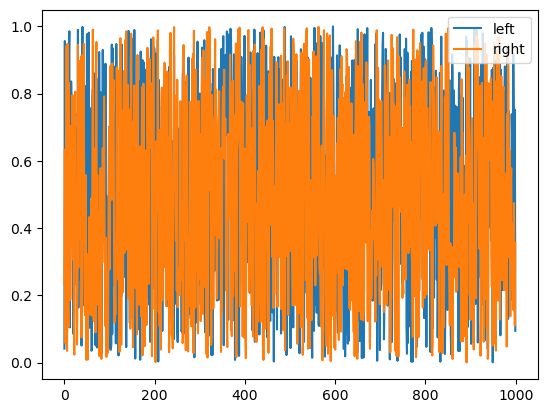

In [244]:

# plt.plot(L_data, label='origin')
plt.plot(left, label='left')
plt.plot(right, label='right')
plt.legend()

#### Similarity

In [374]:
N_phase_for_plot = 45
phase_for_plot = np.linspace(0, 1, N_phase_for_plot)

In [504]:
y_data = np.random.rand() * np.sin(phase_for_plot * 2 * np.pi) # + np.random.rand() * np.sin(2*(phase_for_plot * 2 * np.pi))
# mean = 0
# std = 1
# y_data = np.random.normal(loc=mean, scale=std, size=N_phase_for_plot)

In [508]:
y_data = np.abs(y_data)

In [388]:
# max_idx = np.argmax(y_data)
# y_data = np.roll(y_data, -max_idx)

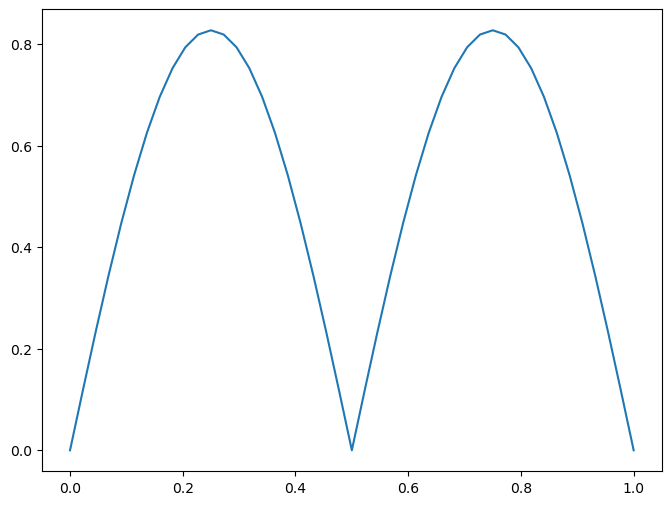

In [510]:
fig, ax = plt.subplot_mosaic('a', figsize=(8, 6))
ax['a'].plot(phase_for_plot, y_data)

In [528]:
df[['delta_sim']] = df.apply(get_similarity_metric_for_row, args=(y_data,), axis=1).apply(pd.Series)

In [596]:
df.sort_values('delta_sim')

,theta_obs,beta_mu,mc2,a_portion,phi_0,L_x,PF,R_e,ksi_shock,L_0,...,L_38,L_39,L_40,L_41,L_42,L_43,L_44,asymetry_metric,best_id_split,delta_sim
2230,90,80,30,0.40,0,5.544331e+38,0.980219,1265.662572,4.937890,3.203883e+36,...,2.774224e+38,2.488203e+38,2.143793e+38,1.754398e+38,1.332108e+38,8.940039e+37,5.181868e+37,0.373006,11.0,0.735484
2231,90,80,30,0.50,0,6.085180e+38,0.849605,1265.551322,4.387254,3.486549e+37,...,3.705525e+38,3.335065e+38,2.881177e+38,2.389582e+38,1.858286e+38,1.297769e+38,8.437155e+37,0.332381,34.0,0.740166
1628,60,60,60,0.25,100,6.400528e+38,0.743890,62.216984,13.923566,6.366476e+38,...,2.025331e+38,1.778582e+38,2.119282e+38,2.534621e+38,3.174863e+38,4.256037e+38,5.296892e+38,0.596246,30.0,0.743909
2244,90,80,100,0.40,0,1.005666e+39,0.945919,897.271783,10.129916,1.598635e+37,...,5.044166e+38,4.532615e+38,3.920063e+38,3.210643e+38,2.443410e+38,1.652747e+38,9.265150e+37,0.353226,34.0,0.747139
2237,90,80,60,0.40,0,7.984524e+38,0.972460,1038.267757,7.408427,6.399603e+36,...,4.003245e+38,3.604350e+38,3.108078e+38,2.549095e+38,1.942149e+38,1.320911e+38,7.345429e+37,0.364419,34.0,0.747573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,80,20,30,0.60,0,6.668857e+38,0.841907,43.225121,5.110460,1.237012e+38,...,7.601353e+37,8.767438e+37,9.744693e+37,1.063318e+38,1.140873e+38,1.195229e+38,1.229517e+38,1.061193,22.0,3.653660
1976,80,40,30,0.40,0,5.684097e+38,0.898779,65.041331,6.385964,2.864536e+37,...,2.944264e+38,1.432080e+38,5.957804e+37,4.854488e+37,3.991167e+37,3.300172e+37,2.946416e+37,0.544214,23.0,3.655279
1729,70,10,30,0.60,0,6.669146e+38,0.885982,39.356693,5.143885,6.547609e+37,...,5.856007e+37,5.359427e+37,4.959210e+37,5.104420e+37,5.636888e+37,6.155268e+37,6.488046e+37,0.873021,23.0,3.659397
1747,70,20,30,0.60,0,6.668857e+38,0.895961,43.225121,5.110460,6.868986e+37,...,4.843632e+37,4.348166e+37,4.323518e+37,5.052768e+37,6.003605e+37,6.550991e+37,6.843072e+37,0.997082,22.0,3.704527


In [ ]:
# df.sort_values('delta_sim').index[2230]

In [638]:
model_args = get_model_args_by_idx(2230)

In [640]:
# theta_obs = 80
# beta_mu = 20
# mc2 = 100
# a_portion = 1
# phi_0 = 0

# L_data = get_L(theta_obs, beta_mu, mc2, a_portion, phi_0)
L_data = get_L(*model_args)

In [642]:
L_data

array([3.20388252e+36, 5.18221719e+37, 8.93900366e+37, 1.33209624e+38,
       1.75448948e+38, 2.14412896e+38, 2.48820347e+38, 2.77422361e+38,
       2.98731828e+38, 3.12171045e+38, 3.19824874e+38, 3.14058281e+38,
       3.19174717e+38, 3.17432638e+38, 3.07140334e+38, 2.89520820e+38,
       2.65043862e+38, 2.32803372e+38, 1.96143547e+38, 1.54909817e+38,
       1.11720768e+38, 6.65247961e+37, 3.19483348e+36, 3.19483348e+36,
       6.65247961e+37, 1.11720768e+38, 1.54909817e+38, 1.96143547e+38,
       2.32803372e+38, 2.65043862e+38, 2.89520820e+38, 3.07140334e+38,
       3.17432638e+38, 3.19174717e+38, 3.14058281e+38, 3.19824874e+38,
       3.12171045e+38, 2.98731828e+38, 2.77422361e+38, 2.48820347e+38,
       2.14379290e+38, 1.75439830e+38, 1.33210834e+38, 8.94003887e+37,
       5.18186794e+37])

In [644]:
L_data_norm = L_data / np.max(L_data)
L_data_norm = roll_to_max(L_data_norm)

y_data_norm = y_data/ np.max(y_data)
y_data_norm = roll_to_max(y_data_norm)

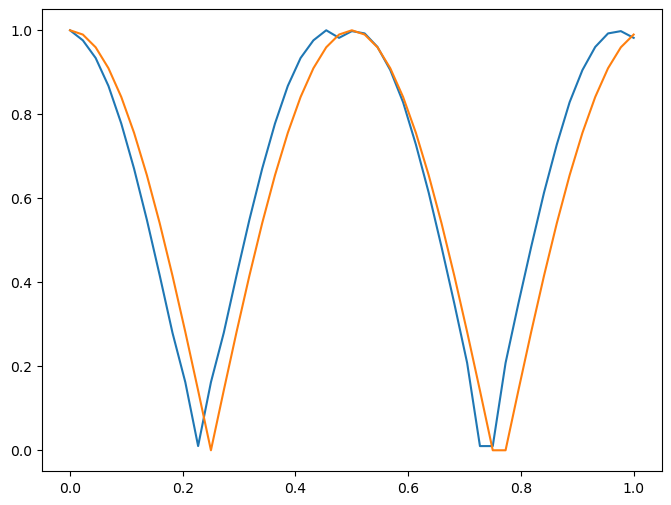

In [646]:
fig, ax = plt.subplot_mosaic('a', figsize=(8, 6))
ax['a'].plot(phase_for_plot, L_data_norm)
ax['a'].plot(phase_for_plot, y_data_norm)

#### Interpolate

In [648]:
from scipy import interpolate

In [654]:
new_phase = np.linspace(0, 1, 20)

In [656]:
y_data = np.abs(np.random.rand() * np.sin(new_phase * 2 * np.pi) )# + np.random.rand() * np.sin(2*(phase_for_plot * 2 * np.pi))
# mean = 0

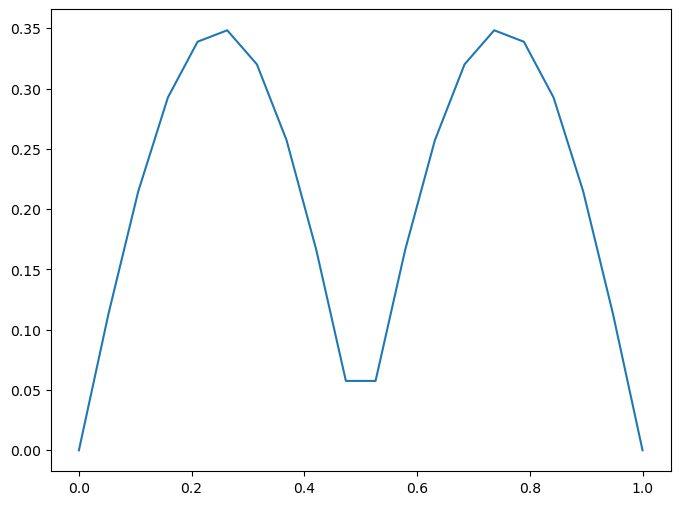

In [660]:
fig, ax = plt.subplot_mosaic('a', figsize=(8, 6))
# ax['a'].plot(phase_for_plot, L_data_norm)
ax['a'].plot(new_phase, y_data)

In [662]:
# # Исходный сигнал (пример: 20 точек)
# x_original = np.linspace(0, 1, 20)  # Фаза исходного сигнала
# y_original = np.random.rand(20)      # Значения сигнала

# # Новая фаза (45 точек)
# x_new = np.linspace(0, 1, 45)

f = interpolate.interp1d(new_phase, y_data, kind='cubic')
y_resampled = f(phase_for_plot)

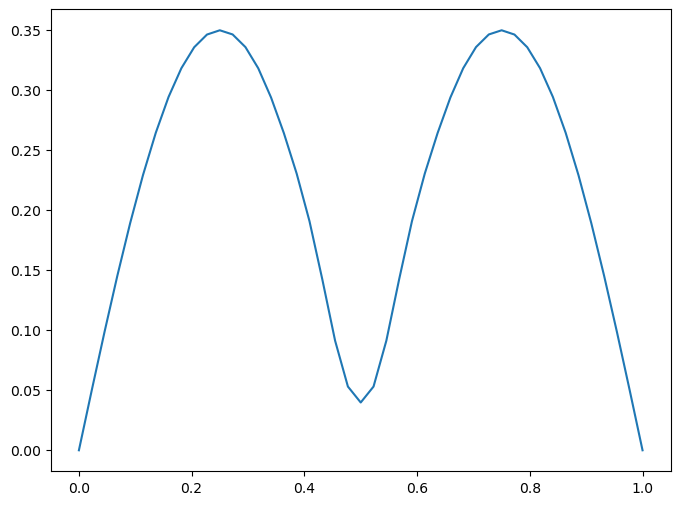

In [664]:
fig, ax = plt.subplot_mosaic('a', figsize=(8, 6))
# ax['a'].plot(phase_for_plot, L_data_norm)
ax['a'].plot(phase_for_plot, y_resampled)

In [652]:
y_resampled

array([ 0.99286661,  0.97288681,  0.88038832,  0.72509072,  0.51671361,
        0.2664219 ,  0.05366017,  0.05426809,  0.36038728,  0.75325235,
        0.97460207,  1.01052175,  0.97519042,  0.90352873,  0.73158146,
        0.44508344,  0.19293587,  0.13154121,  0.24768669,  0.44913707,
        0.62420154,  0.64101952,  0.45181989,  0.2226933 ,  0.12223933,
        0.12142222,  0.11701251,  0.09609887,  0.13004569,  0.24934052,
        0.38890386,  0.49071408,  0.60424586,  0.80453471,  0.98461612,
        0.89165934,  0.50622573,  0.25416523,  0.46765908,  0.81066329,
        0.78787647,  0.38435906, -0.07459593, -0.25649359,  0.17116099])

In [ ]:
def resample_to_45(y_original):
    # Фаза исходного сигнала (нормированная на [0, 1])
    x_original = np.linspace(0, 1, len(y_original))
    
    # Новая фаза (45 точек)
    x_new = np.linspace(0, 1, 45)
    
    # Линейная интерполяция
    f = interpolate.interp1d(x_original, y_original, kind='cubic')
    y_resampled = f(x_new)
    
    y_resampled = np.interp(x_new, x_original, y_original)
    return y_resampled

# Пример использования
y_random_length = np.random.rand(30)  # Сигнал из 30 точек
y_45_points = resample_to_45(y_random_length)  # Теперь 45 точек

#### Smth

#### Save

In [240]:
df.to_parquet('data.parquet')